# Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('fruit_data_with_colors.txt', sep='\t')

In [3]:
X = data.iloc[:,-4:]
y = data['fruit_label']

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
scale = MinMaxScaler()
Xtrain_scaled = scale.fit_transform(X_train)
Xtest_scaled = scale.transform(X_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 4), (15, 4), (44,), (15,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain_scaled, y_train)
pred = knn.predict(Xtest_scaled)

In [10]:
print('Accuracy for test data is {} %'.format(np.mean(y_test==pred)*100))

Accuracy for test data is 100.0 %


In [11]:

example_fruit = [[5.5, 2.2, 10, 0.70]]
scaled_example = scale.transform(example_fruit)
knn.predict(scaled_example)


array([4], dtype=int64)

# Creating Data

In [12]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

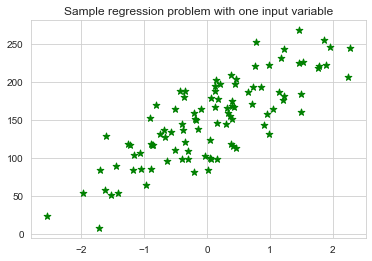

In [13]:
from sklearn.datasets import make_regression
# plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker='*', s=50, color='g')
plt.show()

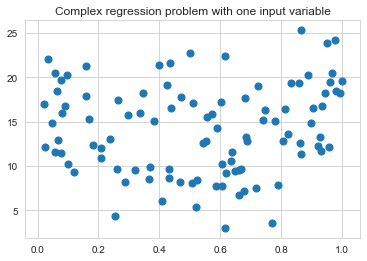

In [14]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

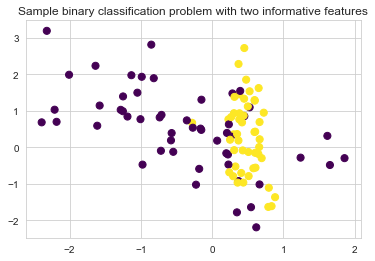

In [15]:
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0,n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap='viridis')
plt.show()

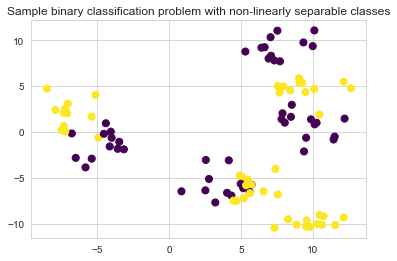

In [16]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap='viridis')
plt.show()

In [17]:
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
cancerdf = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
cancerdf['target'] = cancer['target']

In [19]:

crime = pd.read_csv('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')

In [20]:
crime = crime.iloc[:,([5, 6] + list(range(11,26)) + list(range(32, 103)) + [145])].dropna()

In [21]:
X_crime = crime.drop('ViolentCrimesPerPop', axis=1)
y_crime= crime['ViolentCrimesPerPop']

# Working with the Data

# Classification with KNN

In [22]:
from adspy_shared_utilities import plot_two_class_knn

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, test_size=0.25, random_state=42)

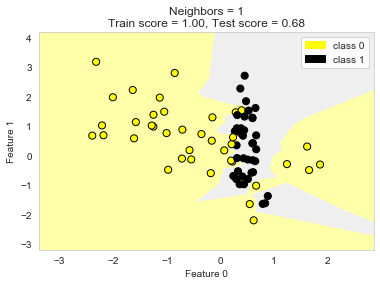

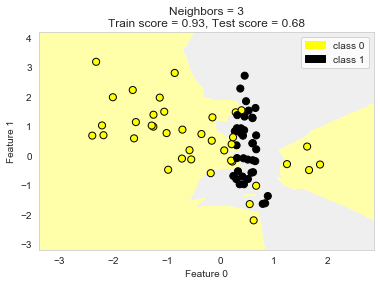

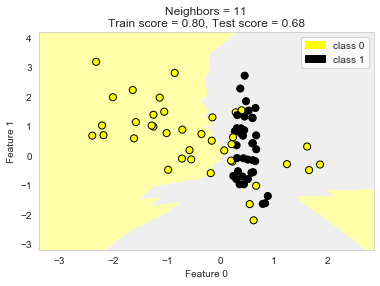

In [24]:
for i in [1,3,11]:
    plot_two_class_knn(X_train,y_train ,i ,'uniform', X_test,y_test)

# Regression with KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,test_size=0.25, random_state = 0)

In [27]:
knn = KNeighborsRegressor().fit(X_train, y_train)

In [28]:
print('Rsquared score is {}'.format(knn.score(X_test, y_test)))

Rsquared score is 0.4246800858234563


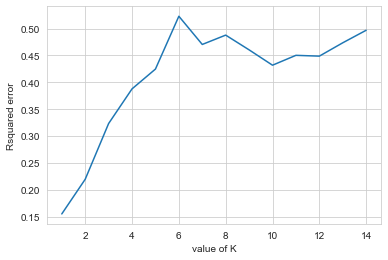

In [29]:
np.random.seed(0)
score = []
for k in range(1,15):
    knn = KNeighborsRegressor(k).fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
plt.plot(range(1,15), score)
plt.xlabel('value of K')
plt.ylabel('Rsquared error');

# Regression with Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,test_size=0.25,random_state = 0)

In [31]:
ln = LinearRegression().fit(X_train, y_train)
print('R2 score for Linear Regression is {}'.format(ln.score(X_test, y_test)))

R2 score for Linear Regression is 0.49159615934930306


In [32]:
'cofficient:', [X_train.shape[1], ln.coef_[0]], 'intercept:', ln.intercept_

('cofficient:', [1, 45.708704645536564], 'intercept:', 148.44575345658873)

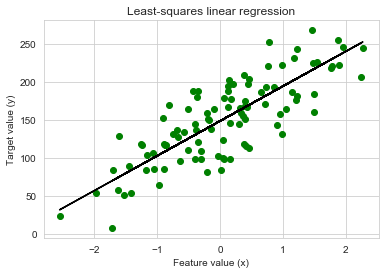

In [33]:
plt.scatter(X_R1, y_R1, color='g')
plt.plot(X_R1, X_R1*ln.coef_[0] + ln.intercept_, 'k')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,test_size=0.25,random_state = 0)

In [35]:
ln = LinearRegression().fit(X_train, y_train)

In [36]:
print('Crime Dataset\n')
print('Cofficients:\n {}'.format(ln.coef_))
print('\nIntercept: {}'.format(ln.intercept_))
print('R2 score for Crime Dataset is {}'.format(ln.score(X_test, y_test)))     


Crime Dataset

Cofficients:
 [ 1.61892346e-03 -9.43009110e+01  1.36067510e+01 -3.13380670e+01
 -8.15482721e-02 -1.69455128e+01 -2.42730375e-03  1.53013232e+00
 -1.39193248e-02 -7.72112833e+00  2.28112354e+01 -5.65708295e+00
  9.34751364e+00  2.06969566e-01 -7.43413626e+00  9.65856476e-03
  4.38030290e-03  4.79754625e-03 -4.46469212e+00 -1.60907140e+01
  8.82778012e+00 -5.06734503e-01 -1.42198055e+00  8.17551991e+00
 -3.87048268e+00 -3.54209213e+00  4.48758304e+00  9.30645715e+00
  1.73644996e+02  1.18220766e+01  1.51120836e+02 -3.29613007e+02
 -1.35343395e+02  6.95380108e-01 -2.38369008e+01  2.77038981e+00
  3.82248925e-01  4.38813358e+00 -1.06410851e+01 -4.92294176e-03
  4.14031827e+01 -1.16206866e-03  1.18568968e+00  1.75418465e+00
 -3.68283678e+00  1.59679443e+00 -8.42180230e+00 -3.79703897e+01
  4.74076990e+01 -2.50768374e+01 -2.88246410e-01 -3.65633234e+01
  1.89516080e+01 -4.53336736e+01  6.82698598e+02  1.04478671e+02
 -3.28575414e+02 -3.14364068e+01  2.74053494e+01  5.12336432e

# Regression with Ridge

In [37]:
from sklearn.linear_model import Ridge

In [38]:
# still working with crime dataset
ridge = Ridge(alpha=10).fit(X_train, y_train)

In [39]:
print('Crime Dataset\n')
print('Cofficients:\n {}'.format(ridge.coef_))
print('\nIntercept: {}'.format(ridge.intercept_))
print('R2 score for Crime Dataset is {}'.format(ridge.score(X_test, y_test)))   

Crime Dataset

Cofficients:
 [ 1.92560216e-03  2.73108957e+01  9.35396917e+00 -3.60779437e+01
  6.37828463e+00 -1.93267146e+01 -2.77405813e-03  1.65384155e+00
 -7.75337076e-03 -7.12441580e+00  1.82129163e+01 -5.67021502e+00
  8.72471908e+00  4.68301762e-01 -7.20230917e+00  7.06013439e-03
  1.76800681e-03  5.01478330e-03 -4.67008002e+00 -1.77734523e+01
  9.18314998e+00 -1.14839198e+00  1.14160908e+00  1.03600700e+01
 -3.79050386e+00 -3.74737656e+00  4.86862406e+00  8.58728482e+00
  4.41066892e+01  1.17648525e+01  1.11940117e+01 -6.45406313e+01
  2.83831705e+01  1.31745760e+00 -2.23238867e+01  2.56066546e+00
  3.71209135e-01  4.07253022e+00 -1.12512996e+01 -4.77691247e-03
  4.21419789e+01 -1.22213211e-03  1.41794304e+00  1.11971435e+00
 -3.23481629e+00  1.23381234e+00 -1.84741251e+01 -1.99418500e+01
  3.18356386e+01 -1.70838234e+01 -4.13938150e-01 -3.60681084e+01
  1.31755752e+01 -3.02591742e+01  7.73823063e+01  6.80493563e+01
 -1.06591268e+02 -2.01105559e+01  2.90959064e+01  4.31603775e

# Ridge with Feature Normalization

In [40]:
scale = MinMaxScaler()
Xtrain_scaled = scale.fit_transform(X_train)
Xtest_scaled = scale.transform(X_test)

In [41]:
ridge = Ridge(alpha=10).fit(Xtrain_scaled, y_train)

In [42]:
print('Crime Dataset\n')
print('Cofficients:\n {}'.format(ridge.coef_))
print('\nIntercept: {}'.format(ridge.intercept_))
print('R2 score for Crime Dataset is {}'.format(ridge.score(Xtest_scaled, y_test)))   

Crime Dataset

Cofficients:
 [ 1.05483607e+02  1.96561127e+01 -6.12414197e+01 -1.22196990e+02
 -8.03052187e+01  4.75533271e-01  1.03082481e+02  1.37299313e+02
  2.86520609e+01 -3.97897623e+01 -3.57606115e+01 -2.38897743e+02
  5.90878589e+00  8.03740499e+01 -1.13596943e+02  1.18798604e+01
  5.09966159e+01  1.08395976e+02  7.34412479e+00 -1.28670537e+02
  1.45473132e+02  8.47230298e+00 -3.60712993e+01  1.81695902e+01
 -1.23387825e+02 -5.78652968e+01 -6.12901525e+00  5.31538576e+01
  1.80486287e+02  1.36418308e+02  1.63206158e+01  8.27831988e+01
  1.19126053e+02 -3.65770383e+02 -5.34351921e+02 -2.71976536e+02
 -2.42065288e+02  3.47886760e+01 -1.55505804e+02  1.33990417e+02
  6.81985084e+02  1.09239263e+01  1.56231269e+01 -4.94914823e+01
 -2.57755421e+01  5.48229332e+01  4.28610880e+00  1.42275250e+01
  5.51487423e+01  7.79815361e+01  1.03118414e+02 -1.13150423e+02
  1.18744813e+02  3.35091989e+01  6.25810912e+01 -1.85077238e+01
  4.35879550e+01 -4.95704420e+01  1.79670516e+02  1.17821810e

# Iterating over diff alpha values to find the best alpha value

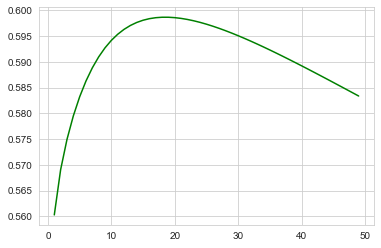

In [43]:
np.random.seed(0)
score=[]
for i in range(1,50):
    ridge = Ridge(alpha=i).fit(Xtrain_scaled, y_train)
    score.append(ridge.score(Xtest_scaled, y_test))
plt.plot(range(1,50), score, color='g');

# max accuracy at alpha=19

# Regression with Lasso

In [44]:
from sklearn.linear_model import Lasso

In [45]:
lasso = Lasso(alpha=1, max_iter=10000).fit(Xtrain_scaled, y_train)

In [46]:
print('Crime Dataset\n')
print('Cofficients:\n {}'.format(lasso.coef_))
print('\nIntercept: {}'.format(lasso.intercept_))
print('R2 score for Crime Dataset is {}'.format(lasso.score(Xtest_scaled, y_test)))   
print('No. of non-zero paramters: {}'.format(sum(lasso.coef_!=0)))

Crime Dataset

Cofficients:
 [    0.             0.            -0.          -361.09407339
    -0.             0.             0.           109.2120849
     0.            -0.             0.          -282.24690049
     0.            -0.           -95.54527311     0.
     0.             0.            -0.           -92.32116317
     0.            -0.            -0.             0.
   -89.04207429    -0.            -0.             0.
   187.93139715     0.             0.             0.
     0.            -0.         -1221.70871412    -0.
    -0.            -0.          -233.54413692     0.
  1479.1847506     -0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.             0.            -0.
     0.             0.             0.             0.
     0.             0.           370.79879828     6.10409026
     0.           755.51120919   -10.47181439     0.
   202.9137892     -0.            84.19019895    30.74949551
    -0.             0. 

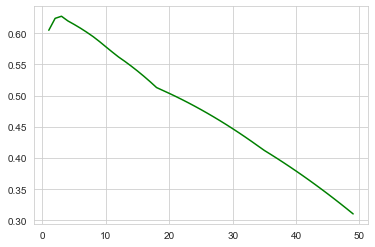

In [47]:
np.random.seed(0)
score=[]
for i in range(1,50):
    lasso = Lasso(alpha=i).fit(Xtrain_scaled, y_train)
    score.append(lasso.score(Xtest_scaled, y_test))
plt.plot(range(1,50), score, color='g');

# max accuracy at alpha=3

# Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

# W/O adding features

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, test_size=0.25, random_state=0)

In [50]:
ln = LinearRegression().fit(X_train, y_train)


In [51]:

print('Cofficients:\n {}'.format(ln.coef_))
print('\nIntercept: {}'.format(ln.intercept_))
print('R2 score w/o adding features is {}'.format(ln.score(X_test, y_test)))   

Cofficients:
 [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]

Intercept: 1.5425091975373046
R2 score w/o adding features is 0.7221339576925415


# Adding features

In [52]:
poly = PolynomialFeatures(2)
poly_X_F1 =poly.fit_transform(X_F1) 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(poly_X_F1, y_F1, test_size=0.25, random_state=0)

In [54]:
ln = LinearRegression().fit(X_train, y_train)
print('Cofficients:\n {}'.format(ln.coef_))
print('\nIntercept: {}'.format(ln.intercept_))
print('R2 score after adding features is {}'.format(ln.score(X_test, y_test)))   

Cofficients:
 [ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]

Intercept: -3.205674398929167
R2 score after adding features is 0.8046437550509977


# Poly + Ridge

In [55]:
#  of many polynomial features often leads to\n\
# overfitting, so we often use polynomial features in combination\n\
# with regression that has a regularization penalty, like ridge\n\
# regression

In [56]:
ridge = Ridge(alpha=1).fit(X_train, y_train)

print('Cofficients:\n {}'.format(ridge.coef_))
print('\nIntercept: {}'.format(ridge.intercept_))
print('R2 score after adding features is {}'.format(ridge.score(X_test, y_test)))   

Cofficients:
 [ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]

Intercept: 5.4180930492552
R2 score after adding features is 0.8251115209759516


# Classification

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

In [58]:
X_2d = X.iloc[:,1:3]
apple = (y==1).astype(np.int)

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X_2d, apple, test_size=0.25, random_state = 0)

Accuracy of Logistic regression classifier on test set: 0.7333333333333333


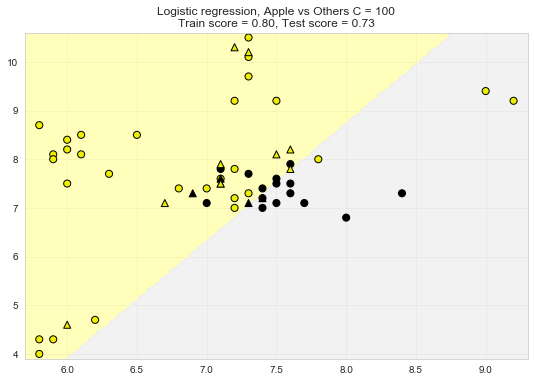

In [60]:
logreg = LogisticRegression(C=100).fit(X_train, y_train)
fig, axes = plt.subplots(1, 1, figsize=(9, 6))
title = 'Logistic regression, Apple vs Others C = {}'.format(100)
plot_class_regions_for_classifier_subplot(logreg, np.array(X_train), y_train,np.array(X_test), y_test,title, axes)
print('Accuracy of Logistic regression classifier on test set: {}'.format(logreg.score(X_test,y_test)))

In [61]:
h = 6
w = 8
for i in range(2):
    pred = logreg.predict(np.array((h,w)).reshape(1,-1))
    if pred == 0:
        print('A fruit with height {} and width {} is predicted to be an apple'.format(h,w))
    else:
        print('A fruit with height {} and width {} is predicted to be not an apple'.format(h,w))
    h = 10
    w = 7

A fruit with height 6 and width 8 is predicted to be an apple
A fruit with height 10 and width 7 is predicted to be not an apple


# Varying C

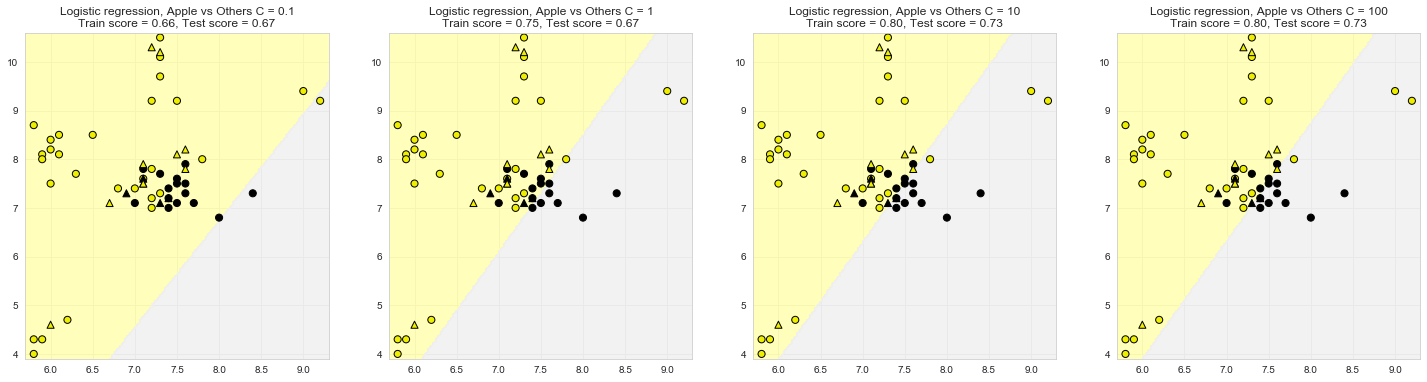

In [62]:

C = [0.1,1,10,100]
fig, axes = plt.subplots(1, 4, figsize=(25,6))
for i,c in enumerate(C):
    logreg = LogisticRegression(C=c).fit(X_train, y_train)
    title = 'Logistic regression, Apple vs Others C = {}'.format(c)
    plot_class_regions_for_classifier_subplot(logreg, np.array(X_train), y_train,np.array(X_test), y_test,title, axes[i])
    

Accuracy of Logistic regression classifier on test set: 0.84


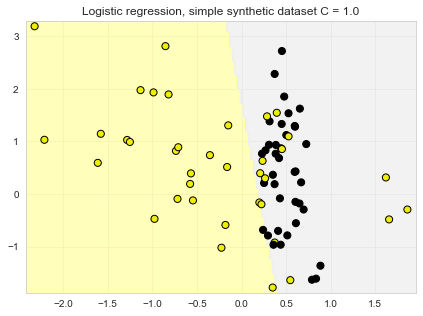

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,test_size=0.25, random_state = 0)
                                                   

fig, axes = plt.subplots(1, 1, figsize=(7, 5))
logreg = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {}'.format(1.0)
plot_class_regions_for_classifier_subplot(logreg, X_train, y_train,
                                         None, None, title, axes)

print('Accuracy of Logistic regression classifier on test set: {}'
     .format(logreg.score(X_test, y_test)))
     

# Logistic Regression on real Dataset

In [64]:
X = cancerdf.drop('target',axis=1)
y = cancerdf['target']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 0)

In [66]:
logreg = LogisticRegression( max_iter=10000).fit(X_train, y_train)
print('Accuracy for Cancer data set : {}'.format(logreg.score(X_test, y_test)))

Accuracy for Cancer data set : 0.951048951048951


# Support Vector Machines

In [67]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,test_size=0.25 ,random_state = 0)

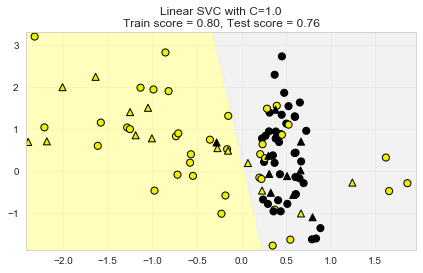

In [69]:
fig,axes = plt.subplots(1,1,figsize=(7,4))
svm = SVC(kernel='linear').fit(X_train,y_train)
title = 'Linear SVC with C=1.0'
plot_class_regions_for_classifier_subplot(svm,np.array(X_train), y_train,np.array(X_test), y_test,title, axes)

# Varying C

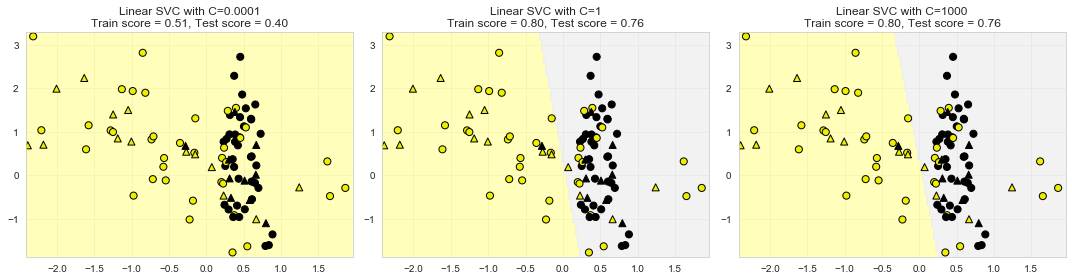

In [70]:
C = [0.0001,1,1000]
fig,axes = plt.subplots(1,3,figsize=(15,4))
for i,c in enumerate(C):
    svm = SVC(C=c, kernel='linear').fit(X_train,y_train)
    title = 'Linear SVC with C={}'.format(c)
    plot_class_regions_for_classifier_subplot(svm,np.array(X_train), y_train,np.array(X_test), y_test,title, axes[i])
plt.tight_layout()

# LSVM on real Dataset


In [71]:
X = cancerdf.drop('target',axis=1)
y = cancerdf['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 0)

In [72]:
lsvm = SVC(C=1, kernel='linear').fit(X_train, y_train)
print('Accuracy for Cancer data set : {}'.format(lsvm.score(X_test, y_test)))

Accuracy for Cancer data set : 0.958041958041958


# Multi Class Classification with Linear Model

In [73]:
y = data['fruit_label']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.25, random_state = 0)


In [75]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=5,random_state=67).fit(X_train,y_train)

C:\Users\Fida Hussain\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [76]:
print('Coefficients:\n', svc.coef_)
print('Intercepts:\n', svc.intercept_)

Coefficients:
 [[ 0.72246132 -0.23401135]
 [ 1.15222281 -1.63231901]
 [ 0.31186707  0.0849835 ]
 [-1.68097     1.26189663]]
Intercepts:
 [-3.31753728  1.19645936 -2.7468353   1.16107418]


# Predicting Manually using Coeff

In [77]:
k = y.nunique()
m = len(X_test)

list_= np.zeros((m,2))
for j in range(m):
    score=0
    for i in range(k):
        score = (np.dot(np.array(X_test.iloc[j]), svc.coef_[i]) + svc.intercept_[i])
        if score > list_[j][1]:
            list_[j][0] = i
            list_[j][1] = score

In [78]:
np.mean((list_[:,0].reshape(-1,1) +1) == np.array(y_test).reshape(-1,1))

0.6666666666666666

# Predicting Directly

In [79]:
print('Accuracy for fruits dataset with LSVC is {}'.format(svc.score(X_test,y_test)))

Accuracy for fruits dataset with LSVC is 0.7333333333333333


# SVC with non linear data

In [80]:
from adspy_shared_utilities import plot_class_regions_for_classifier

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, test_size=0.25, random_state=0)

	Accuracy on testing data : 0.68


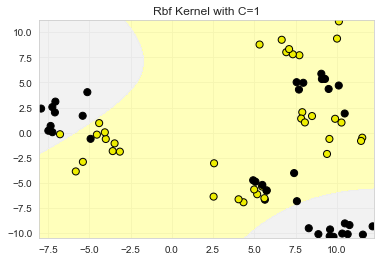

In [103]:
svc_rbf = SVC().fit(X_train, y_train)
print('\tAccuracy on testing data : {}'.format(svc_rbf.score(X_test, y_test)))
plot_class_regions_for_classifier(svc_rbf, X_train,y_train, None,None,'Rbf Kernel with C=1' )

	Accuracy on testing data : 0.68


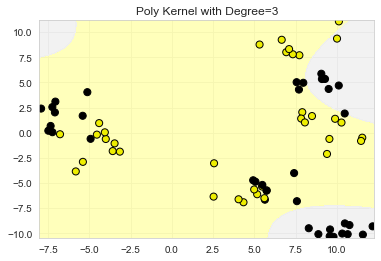

In [96]:
svc_poly = SVC(kernel='poly', degree=4).fit(X_train, y_train)
print('\tAccuracy on testing data : {}'.format(svc_poly.score(X_test, y_test)))
plot_class_regions_for_classifier(svc_poly, X_train,y_train, None,None,'Poly Kernel with Degree=3' )

# Varying Gamma Paramter in SVC

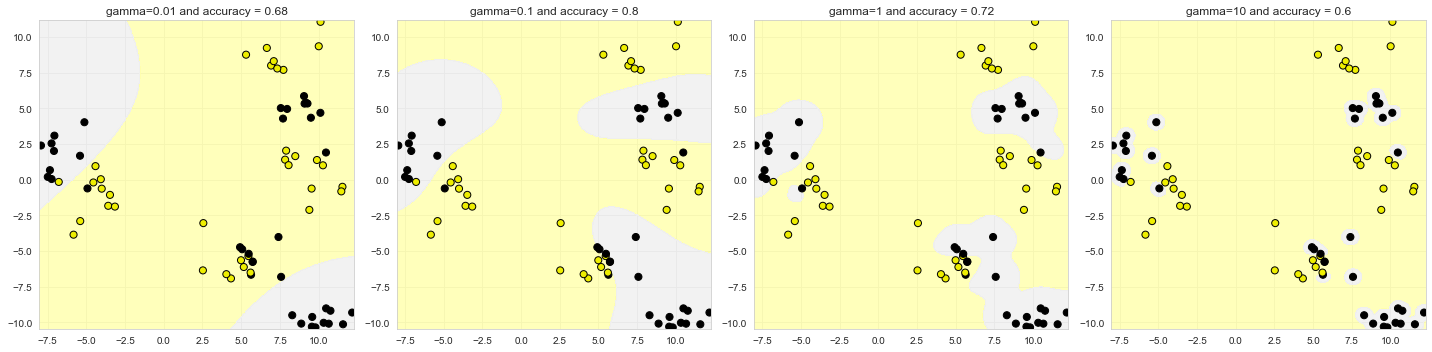

In [114]:
fig,axes = plt.subplots(1,4,figsize=(20,5))
for i,g in enumerate([0.01,0.1,1,10]):
    svc = SVC(kernel='rbf',gamma=g).fit(X_train,y_train)
    title='gamma={} and accuracy = {}'.format(g, svc.score(X_test, y_test))
    plot_class_regions_for_classifier_subplot(svc, np.array(X_train), y_train, None,None, title, axes[i])
    plt.tight_layout()

# Varying Gamma and C

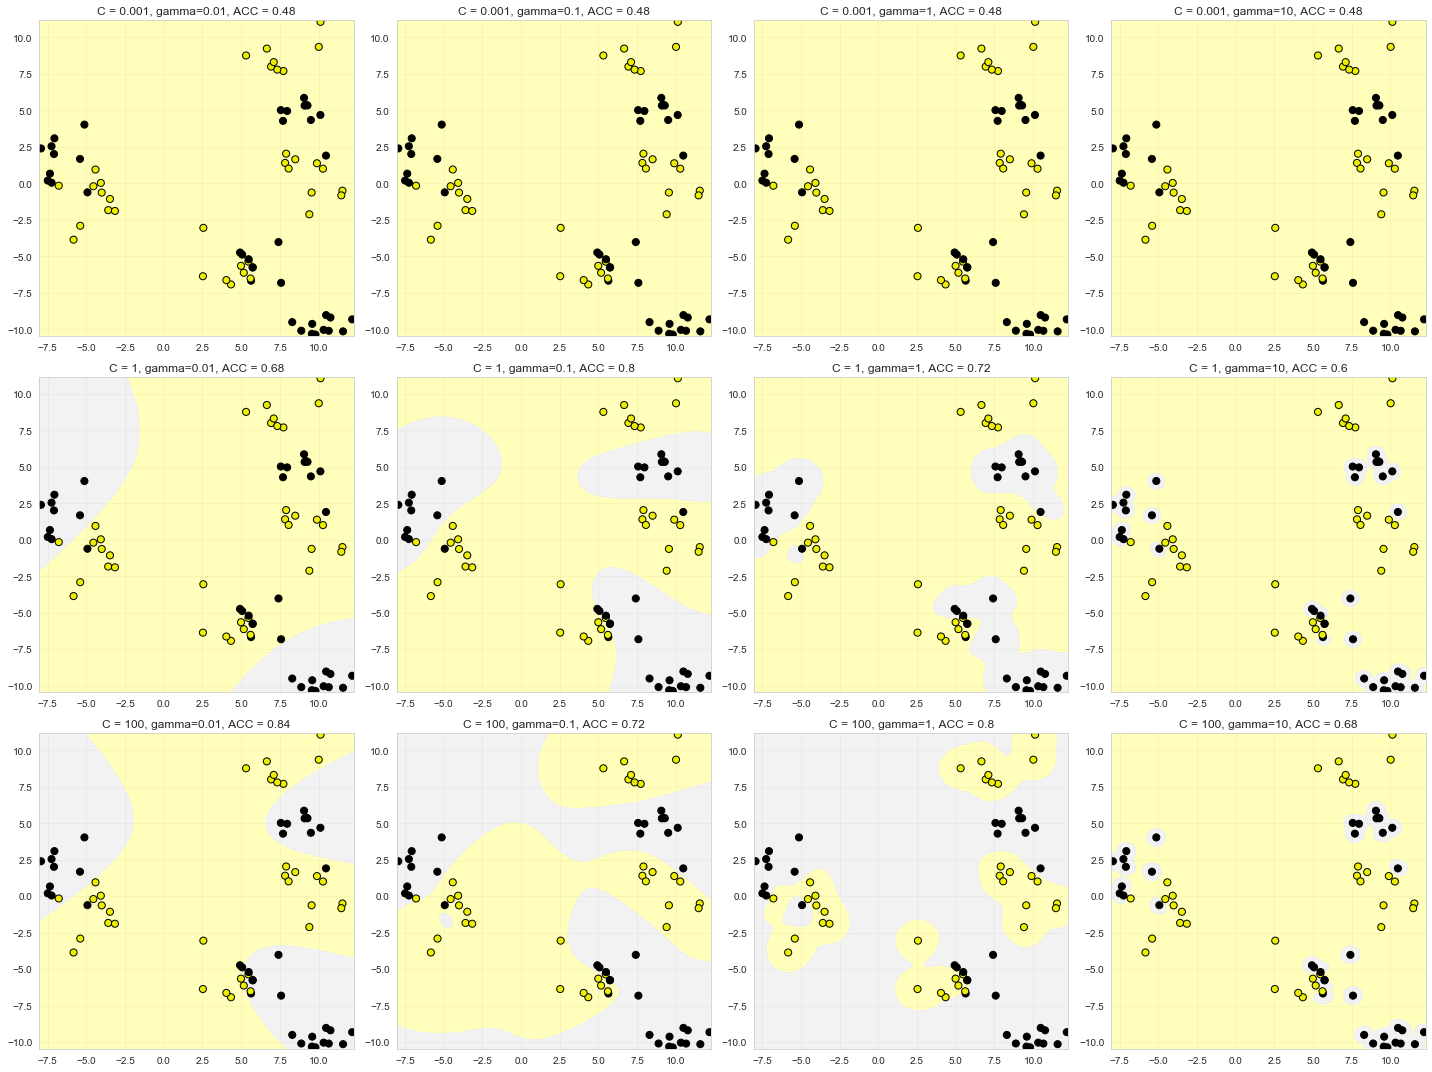

In [115]:
fig,axes= plt.subplots(3,4,figsize=(20,15))
for i,c in enumerate([0.001, 1, 100]):
    for j,g in enumerate([0.01,0.1,1,10]):
        svc = SVC(C=c, gamma=g,kernel='rbf').fit(X_train, y_train)
        title = 'C = {}, gamma={}, ACC = {}'.format(c,g,svc.score(X_test, y_test))
        plot_class_regions_for_classifier_subplot(svc, np.array(X_train), y_train,None,None, title,axes[i][j])
        plt.tight_layout()


# Applying SVC on non-normalized Real world dataset

In [119]:
X_cancer = cancerdf.drop('target',axis=1)
y_cancer = cancerdf['target']

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)

In [134]:
svc = SVC(C=10, gamma=0.0001).fit(X_train, y_train)
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on test set: 0.96


# Applying SVC on normalized Data

In [135]:
scale = MinMaxScaler()
Xtrain_scaled = scale.fit_transform(X_train)
Xtest_scaled = scale.transform(X_test)

In [146]:
svc = SVC(C=100, gamma=0.1).fit(Xtrain_scaled, y_train)
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'.format(svc.score(Xtest_scaled, y_test)))

Accuracy of RBF-kernel SVC on test set: 0.97


# Cross Validation

In [147]:
from sklearn.model_selection import cross_val_score

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.25, random_state=0)

In [154]:
knn = KNeighborsClassifier(n_neighbors=5)
cv = cross_val_score(knn, X_train,y_train, cv=4)

In [156]:
print('Cross-validation scores (4-fold):', cv)
print('Mean cross-validation score (4-fold): {:.3f}'.format(np.mean(cv)))

Cross-validation scores (4-fold): [0.81818182 0.63636364 0.72727273 0.81818182]
Mean cross-validation score (4-fold): 0.750


In [157]:
np.logspace(-3, 3, 4)

array([1.e-03, 1.e-01, 1.e+01, 1.e+03])

# Validation Curve for gamma (SVC)

In [159]:
from sklearn.model_selection import validation_curve

In [162]:
train_score, test_score = validation_curve(SVC(),X_2d,y,'gamma', np.logspace(-3,3,4))

In [174]:
print('Training Accuracies are : {}'.format(np.mean(train_score,axis=1)))
print('Testing Accuracies are : {}'.format(np.mean(test_score,axis=1)))

Training Accuracies are : [0.39007092 0.77553191 0.88147163 0.9873227 ]
Testing Accuracies are : [0.35454545 0.72878788 0.71363636 0.32272727]


In [180]:
i = np.argmax(np.mean(test_score,axis=1))
print('Best gamma value for this dataset is {}'.format(np.logspace(-3,3,4)[i]))

Best gamma value for this dataset is 0.1


# Validation Curve for C (SVC)

In [181]:
train_score, test_score = validation_curve(SVC(),X_2d,y,'C', [0.001,0.01,0.1,1,10,100,1000])

In [182]:
print('Training Accuracies are : {}'.format(np.mean(train_score,axis=1)))
print('Testing Accuracies are : {}'.format(np.mean(test_score,axis=1)))

Training Accuracies are : [0.39858156 0.39858156 0.44113475 0.81365248 0.8304078  0.84751773
 0.87287234]
Testing Accuracies are : [0.35454545 0.35454545 0.38787879 0.72878788 0.7469697  0.7469697
 0.76515152]


In [184]:
i = np.argmax(np.mean(test_score,axis=1))
print('Best C value for this dataset is {}'.format([0.001,0.01,0.1,1,10,100,1000][i]))

Best C value for this dataset is 1000


# Decision Tree

In [185]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.datasets import load_iris

In [191]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [192]:
irisdf = pd.DataFrame(iris['data'], columns=iris['feature_names'])
irisdf['target'] = iris['target']

In [195]:
X_iris = irisdf.drop('target',axis=1)
y_iris = irisdf['target']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=0)

In [197]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [203]:
print('Train data accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data accuracy: {}'.format(tree.score(X_test,y_test)))

Train data accuracy: 1.0
Test data accuracy: 0.9736842105263158


# controlling max depth

In [205]:
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

print('Train data accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data accuracy: {}'.format(tree.score(X_test,y_test)))

Train data accuracy: 0.9821428571428571
Test data accuracy: 0.9736842105263158


# Feature IMP

In [207]:
from adspy_shared_utilities import plot_feature_importances


Feature importances: [0.       0.       0.944014 0.055986]


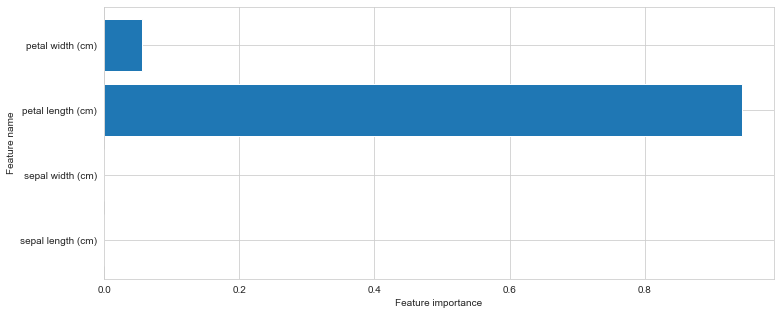

In [210]:
plt.figure(figsize=(12,5))
plot_feature_importances(tree,iris['feature_names'])

print('Feature importances: {}'.format(tree.feature_importances_))

# Decision Tree on a real world dataset

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)

In [239]:
final_ans = [0,2]
for i in range(1,5):
    tree = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
#     trainsc = tree.score(X_train,y_train)
#     testsc = tree.score(X_test,y_test)
    std = np.std((tree.score(X_train,y_train), tree.score(X_test,y_test)))
    if std < final_ans[1] :
        final_ans[1] = std
        final_ans[0] = i

In [242]:
print('Most optimum depth : {}'.format(final_ans[0]))

Most optimum depth : 2


In [243]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

print('Train data accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data accuracy: {}'.format(tree.score(X_test,y_test)))

Train data accuracy: 0.9413145539906104
Test data accuracy: 0.9370629370629371


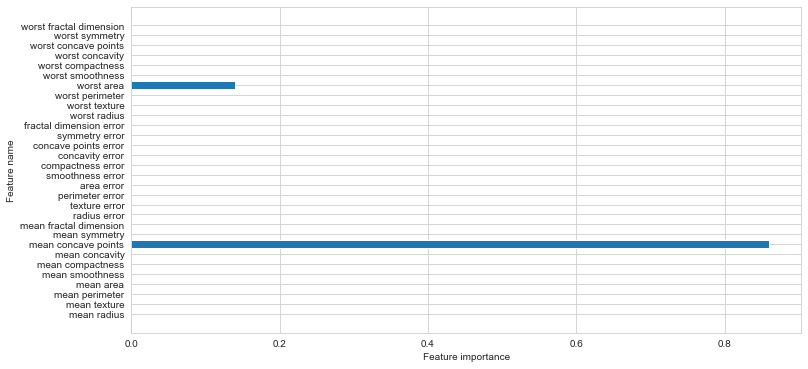

In [245]:
plt.figure(figsize=(12,6))
plot_feature_importances(tree, cancer.feature_names)